In [77]:
import tensorflow as tf
import pandas as pd
import numpy as 
from sklearn.metrics import mean_squared_error



In [78]:
data = pd.read_csv('../assignment 3/data/q2_dataset.csv')

In [79]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91


In [80]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21
1258,07/09/15,$120.07,78291510,123.85,124.06,119.22


In [81]:
type(data)

pandas.core.frame.DataFrame

In [82]:
list(data.columns)

['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']

In [83]:
data.columns = data.columns.str.strip()
list(data.columns)

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [84]:
data['target']= data['Open']
data['Date'] =pd.to_datetime(data.Date)
data=data.sort_values(by='Date')
data.head()

,Date,Close/Last,Volume,Open,High,Low,target
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72


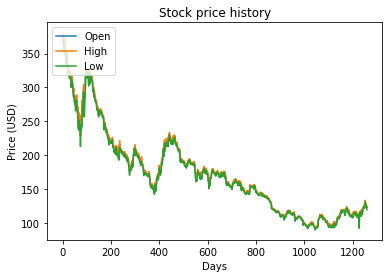

In [85]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
#plt.plot(data["Close"])
plt.title('Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low'], loc='upper left')
plt.show()

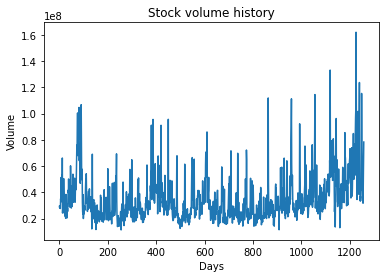

In [86]:
plt.figure()
plt.plot(data["Volume"])
plt.title('Stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [87]:
#create features using columns from previous 3 days
data['Volume_t-3'] = data.shift(3)['Volume']
data['Volume_t-2'] = data.shift(2)['Volume']
data['Volume_t-1'] = data.shift(1)['Volume']
data['Open_t-3'] = data.shift(3)['Open']
data['Open_t-2'] = data.shift(2)['Open']
data['Open_t-1'] = data.shift(1)['Open']
data['High_t-3'] = data.shift(3)['High']
data['High_t-2'] = data.shift(2)['High']
data['High_t-1'] = data.shift(1)['High']
data['Low_t-3'] = data.shift(3)['Low']
data['Low_t-2'] = data.shift(2)['Low']
data['Low_t-1'] = data.shift(1)['Low']
data['target']= data['Open']
data.head()

,Date,Close/Last,Volume,Open,High,Low,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [88]:
data = data.drop(['Close/Last','Volume','Open','High','Low'], axis = 1)
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [89]:
data.isna().sum()

Date          0
target        0
Volume_t-3    3
Volume_t-2    2
Volume_t-1    1
Open_t-3      3
Open_t-2      2
Open_t-1      1
High_t-3      3
High_t-2      2
High_t-1      1
Low_t-3       3
Low_t-2       2
Low_t-1       1
dtype: int64

In [90]:
#drop columns with null values
data = data.dropna()
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04
1253,2015-07-16,127.74,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58
1252,2015-07-17,129.08,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35
1251,2015-07-20,130.97,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31


In [91]:
#shuffle/randomize the data
#data = data.sample(frac = 1).reset_index(drop=True)
#data.head()

In [92]:
list(data.columns)

['Date',
 'target',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1']

In [93]:
data = data[[
 'Date',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1', 
 'target']]
data.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
1255,2015-07-14,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32,126.04
1254,2015-07-15,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,125.72
1253,2015-07-16,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,127.74
1252,2015-07-17,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,129.08
1251,2015-07-20,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,130.97


In [94]:
len(data)

1256

In [100]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train_data_RNN.csv',index=False)
test.to_csv('test_data_RNN.csv',index=False)


In [101]:
type(train)

pandas.core.frame.DataFrame

In [102]:
train.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
566,2018-04-09,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20,169.88
121,2020-01-14,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15,316.70
354,2019-02-11,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42,171.05
676,2017-10-27,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78,159.29
888,2016-12-23,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64,115.59


In [103]:
"""#sklearn alternative for Apple Silicon
def split_train_valid_test(data,test_ratio):
    test_set_size= int(len(data)*test_ratio)
    return data[test_set_size:], data[:test_set_size]

train,test = split_train_valid_test(data,test_ratio=0.3)
train.to_csv('train_data_RNN.csv',index=True)
test.to_csv('test_data_RNN.csv',index=True)
print(len(train),len(test))"""


"#sklearn alternative for Apple Silicon\ndef split_train_valid_test(data,test_ratio):\n    test_set_size= int(len(data)*test_ratio)\n    return data[test_set_size:], data[:test_set_size]\n\ntrain,test = split_train_valid_test(data,test_ratio=0.3)\ntrain.to_csv('train_data_RNN.csv',index=True)\ntest.to_csv('test_data_RNN.csv',index=True)\nprint(len(train),len(test))"

In [104]:
data_train = pd.read_csv('train_data_RNN.csv')
data_test = pd.read_csv('test_data_RNN.csv')

### Preprocessing

The range of the data is widely varied. The values of Volume are very high and could skew the model. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. 

### try standart scaler as well

In [105]:
#separate features and target
X_train = data_train.drop(['Date','target'], axis = 1)
y_train = data_train['target']
X_test_date = data_test
#X_test_date['Date'] =pd.to_datetime(X_test_date.Date)
#X_test_date=X_test_date.sort_values(by='Date')
X_test = data_test.drop(['Date','target'], axis = 1)
y_test = data_test['target']
#y_test = y_test.reindex(X_test_date.index)


In [106]:
X_train


,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20
1,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15
2,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42
3,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78
4,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64
...,...,...,...,...,...,...,...,...,...,...,...,...
874,20182050.0,20670830.0,15955820.0,189.69,191.78,190.68,192.55,192.43,191.96,189.69,190.17,189.56
875,36487930.0,38016810.0,52954070.0,211.15,216.88,219.05,215.18,220.45,222.36,209.27,216.62,216.81
876,28803760.0,33511990.0,36486560.0,303.22,305.64,308.10,305.17,310.35,317.05,301.97,304.29,307.24
877,35907770.0,25402270.0,21983410.0,151.78,153.80,153.89,153.92,154.72,154.28,151.69,153.54,152.70


In [107]:
X_test

,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70
1,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62
2,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37
3,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77
4,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12
...,...,...,...,...,...,...,...,...,...,...,...,...
372,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80
373,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74
374,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33
375,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43


In [108]:
y_train

0      169.88
1      316.70
2      171.05
3      159.29
4      115.59
        ...  
874    192.45
875    209.55
876    317.83
877    153.21
878    167.88
Name: target, Length: 879, dtype: float64

In [109]:
y_test

0      132.85
1      144.49
2      116.44
3      191.81
4      108.91
        ...  
372    112.02
373    205.53
374    148.82
375    273.61
376    284.82
Name: target, Length: 377, dtype: float64

In [110]:
X_test_date

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
0,2015-07-21,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,132.85
1,2017-06-28,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62,144.49
2,2015-09-25,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37,116.44
3,2019-06-10,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77,191.81
4,2016-04-08,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12,108.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2015-12-17,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80,112.02
373,2019-08-02,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74,205.53
374,2017-07-17,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33,148.82
375,2020-04-22,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43,273.61


In [111]:
#create validation set
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=0)


In [112]:
#X_val

In [113]:
#scale the data 
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
#X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

In [114]:
#saving the scaler to apply it on the test dataset
import pickle
with open('scaler_RNN_model','wb') as file_pick:
    pickle.dump(scaler,file_pick)

In [115]:
#numpy array conversion
X_train=np.array(X_train)
#X_val = np.array(X_val)
X_test=np.array(X_test)

In [116]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
#X_val =X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [117]:
X_train.shape[0],X_train.shape[1]


(879, 12)

In [118]:
#X_val.shape[0],X_val.shape[1]


In [119]:
X_test.shape[0],X_test.shape[1]


(377, 12)

In [120]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [121]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
#add dropout

In [122]:
'''
    'mean_squared_error' has been used as loss function
    Optimizer: Here adam optimizer has been used. Adam is an adaptive
    learning rate optimization algorithm that’s been designed specifically for
    training deep neural networks.
    Accuracy is not used as a metric because this is a regression model.
'''
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [124]:
%%time
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2000,batch_size=64,verbose=1)


Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/14 [======================>.......] - ETA: 0s - loss: 33198.7985WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2801ce8b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

Epoch 59/2000
14/14 [==============================] - 0s 6ms/step - loss: 19085.6756 - val_loss: 20805.6328
Epoch 60/2000
14/14 [==============================] - 0s 7ms/step - loss: 19185.3055 - val_loss: 20598.7910
Epoch 61/2000
14/14 [==============================] - 0s 7ms/step - loss: 18478.9374 - val_loss: 20461.1953
Epoch 62/2000
14/14 [==============================] - 0s 8ms/step - loss: 18687.1850 - val_loss: 20298.5234
Epoch 63/2000
14/14 [==============================] - 0s 7ms/step - loss: 19122.2527 - val_loss: 20080.0625
Epoch 64/2000
14/14 [==============================] - 0s 7ms/step - loss: 19576.0164 - val_loss: 19973.0078
Epoch 65/2000
14/14 [==============================] - 0s 7ms/step - loss: 19188.3089 - val_loss: 19778.0469
Epoch 66/2000
14/14 [==============================] - 0s 7ms/step - loss: 18882.7809 - val_loss: 19555.8887
Epoch 67/2000
14/14 [==============================] - 0s 7ms/step - loss: 18742.2520 - val_loss: 19573.9922
Epoch 68/2000
14/14

Epoch 134/2000
14/14 [==============================] - 0s 7ms/step - loss: 9865.1786 - val_loss: 11398.7158
Epoch 135/2000
14/14 [==============================] - 0s 6ms/step - loss: 10338.2720 - val_loss: 11220.1973
Epoch 136/2000
14/14 [==============================] - 0s 7ms/step - loss: 9663.7663 - val_loss: 11213.0771
Epoch 137/2000
14/14 [==============================] - 0s 7ms/step - loss: 10072.1961 - val_loss: 11119.6299
Epoch 138/2000
14/14 [==============================] - 0s 7ms/step - loss: 10291.3968 - val_loss: 11032.4004
Epoch 139/2000
14/14 [==============================] - 0s 7ms/step - loss: 9811.4570 - val_loss: 10905.1025
Epoch 140/2000
14/14 [==============================] - 0s 6ms/step - loss: 10611.9981 - val_loss: 10900.3379
Epoch 141/2000
14/14 [==============================] - 0s 6ms/step - loss: 9712.1089 - val_loss: 10689.8994
Epoch 142/2000
14/14 [==============================] - 0s 6ms/step - loss: 9253.5047 - val_loss: 10667.4785
Epoch 143/2000


14/14 [==============================] - 0s 7ms/step - loss: 6042.6947 - val_loss: 6500.8931
Epoch 210/2000
14/14 [==============================] - 0s 7ms/step - loss: 5872.3534 - val_loss: 6572.9614
Epoch 211/2000
14/14 [==============================] - 0s 6ms/step - loss: 5758.9863 - val_loss: 6424.5024
Epoch 212/2000
14/14 [==============================] - 0s 6ms/step - loss: 6307.5651 - val_loss: 6356.4951
Epoch 213/2000
14/14 [==============================] - 0s 6ms/step - loss: 6360.8713 - val_loss: 6487.3857
Epoch 214/2000
14/14 [==============================] - 0s 6ms/step - loss: 6107.7221 - val_loss: 6401.9375
Epoch 215/2000
14/14 [==============================] - 0s 6ms/step - loss: 5897.3724 - val_loss: 6242.3433
Epoch 216/2000
14/14 [==============================] - 0s 6ms/step - loss: 5748.7827 - val_loss: 6171.7886
Epoch 217/2000
14/14 [==============================] - 0s 6ms/step - loss: 5960.8942 - val_loss: 6183.9429
Epoch 218/2000
14/14 [=====================

Epoch 285/2000
14/14 [==============================] - 0s 8ms/step - loss: 4550.4854 - val_loss: 4539.6855
Epoch 286/2000
14/14 [==============================] - 0s 7ms/step - loss: 4643.4467 - val_loss: 4414.9736
Epoch 287/2000
14/14 [==============================] - 0s 7ms/step - loss: 4563.2501 - val_loss: 4482.8115
Epoch 288/2000
14/14 [==============================] - 0s 8ms/step - loss: 4406.3477 - val_loss: 4467.5679
Epoch 289/2000
14/14 [==============================] - 0s 8ms/step - loss: 4581.7903 - val_loss: 4470.0923
Epoch 290/2000
14/14 [==============================] - 0s 6ms/step - loss: 4356.0211 - val_loss: 4421.4922
Epoch 291/2000
14/14 [==============================] - 0s 6ms/step - loss: 4274.9524 - val_loss: 4400.8911
Epoch 292/2000
14/14 [==============================] - 0s 6ms/step - loss: 4251.1434 - val_loss: 4386.7012
Epoch 293/2000
14/14 [==============================] - 0s 6ms/step - loss: 4440.2845 - val_loss: 4476.4717
Epoch 294/2000
14/14 [======

Epoch 361/2000
14/14 [==============================] - 0s 7ms/step - loss: 4056.2635 - val_loss: 3994.5039
Epoch 362/2000
14/14 [==============================] - 0s 7ms/step - loss: 4377.5271 - val_loss: 4030.9224
Epoch 363/2000
14/14 [==============================] - 0s 7ms/step - loss: 4212.2451 - val_loss: 3953.7554
Epoch 364/2000
14/14 [==============================] - 0s 6ms/step - loss: 4133.6350 - val_loss: 3908.4397
Epoch 365/2000
14/14 [==============================] - 0s 7ms/step - loss: 4265.4708 - val_loss: 3938.1094
Epoch 366/2000
14/14 [==============================] - 0s 6ms/step - loss: 3909.6434 - val_loss: 3948.5735
Epoch 367/2000
14/14 [==============================] - 0s 6ms/step - loss: 4437.9870 - val_loss: 3947.3748
Epoch 368/2000
14/14 [==============================] - 0s 6ms/step - loss: 4392.1527 - val_loss: 3940.2056
Epoch 369/2000
14/14 [==============================] - 0s 8ms/step - loss: 3824.0511 - val_loss: 3930.9065
Epoch 370/2000
14/14 [======

Epoch 437/2000
14/14 [==============================] - 0s 8ms/step - loss: 4332.0873 - val_loss: 3894.7896
Epoch 438/2000
14/14 [==============================] - 0s 7ms/step - loss: 3966.2804 - val_loss: 3857.3130
Epoch 439/2000
14/14 [==============================] - 0s 7ms/step - loss: 4128.9650 - val_loss: 3891.7512
Epoch 440/2000
14/14 [==============================] - 0s 7ms/step - loss: 4156.9460 - val_loss: 3860.1484
Epoch 441/2000
14/14 [==============================] - 0s 7ms/step - loss: 3942.8816 - val_loss: 3872.6731
Epoch 442/2000
14/14 [==============================] - 0s 10ms/step - loss: 4144.7023 - val_loss: 3829.8054
Epoch 443/2000
14/14 [==============================] - 0s 9ms/step - loss: 4166.6598 - val_loss: 3854.3342
Epoch 444/2000
14/14 [==============================] - 0s 8ms/step - loss: 4255.6639 - val_loss: 3992.8057
Epoch 445/2000
14/14 [==============================] - 0s 8ms/step - loss: 3834.0549 - val_loss: 3915.4556
Epoch 446/2000
14/14 [=====

Epoch 513/2000
14/14 [==============================] - 0s 6ms/step - loss: 3872.9343 - val_loss: 3861.2043
Epoch 514/2000
14/14 [==============================] - 0s 6ms/step - loss: 4212.3239 - val_loss: 3892.1006
Epoch 515/2000
14/14 [==============================] - 0s 7ms/step - loss: 3714.9781 - val_loss: 3883.8242
Epoch 516/2000
14/14 [==============================] - 0s 7ms/step - loss: 4100.4814 - val_loss: 3876.3389
Epoch 517/2000
14/14 [==============================] - 0s 6ms/step - loss: 4195.1959 - val_loss: 3945.7437
Epoch 518/2000
14/14 [==============================] - 0s 8ms/step - loss: 4119.7522 - val_loss: 3874.1638
Epoch 519/2000
14/14 [==============================] - 0s 7ms/step - loss: 4502.9010 - val_loss: 3893.5706
Epoch 520/2000
14/14 [==============================] - 0s 7ms/step - loss: 4205.8934 - val_loss: 3820.0103
Epoch 521/2000
14/14 [==============================] - 0s 7ms/step - loss: 4129.1177 - val_loss: 3907.3147
Epoch 522/2000
14/14 [======

Epoch 589/2000
14/14 [==============================] - 0s 6ms/step - loss: 4187.2063 - val_loss: 3906.1067
Epoch 590/2000
14/14 [==============================] - 0s 6ms/step - loss: 3850.1748 - val_loss: 3910.9304
Epoch 591/2000
14/14 [==============================] - 0s 7ms/step - loss: 3965.1343 - val_loss: 3887.5105
Epoch 592/2000
14/14 [==============================] - 0s 6ms/step - loss: 4095.7588 - val_loss: 3887.6528
Epoch 593/2000
14/14 [==============================] - 0s 6ms/step - loss: 4337.8643 - val_loss: 3899.9370
Epoch 594/2000
14/14 [==============================] - 0s 7ms/step - loss: 3958.5196 - val_loss: 3881.4397
Epoch 595/2000
14/14 [==============================] - 0s 6ms/step - loss: 3992.5900 - val_loss: 3849.4316
Epoch 596/2000
14/14 [==============================] - 0s 7ms/step - loss: 4226.2591 - val_loss: 3869.4761
Epoch 597/2000
14/14 [==============================] - 0s 6ms/step - loss: 4462.9383 - val_loss: 3870.6953
Epoch 598/2000
14/14 [======

Epoch 665/2000
14/14 [==============================] - 0s 6ms/step - loss: 3939.4987 - val_loss: 3853.7554
Epoch 666/2000
14/14 [==============================] - 0s 6ms/step - loss: 3993.5879 - val_loss: 3846.1438
Epoch 667/2000
14/14 [==============================] - 0s 6ms/step - loss: 4278.6024 - val_loss: 3864.4233
Epoch 668/2000
14/14 [==============================] - 0s 6ms/step - loss: 3917.4354 - val_loss: 3880.8779
Epoch 669/2000
14/14 [==============================] - 0s 6ms/step - loss: 4004.3434 - val_loss: 3872.7400
Epoch 670/2000
14/14 [==============================] - 0s 6ms/step - loss: 4036.8429 - val_loss: 3857.4221
Epoch 671/2000
14/14 [==============================] - 0s 6ms/step - loss: 4159.8786 - val_loss: 3848.4673
Epoch 672/2000
14/14 [==============================] - 0s 6ms/step - loss: 4120.6118 - val_loss: 3903.0139
Epoch 673/2000
14/14 [==============================] - 0s 6ms/step - loss: 4249.4574 - val_loss: 3832.4470
Epoch 674/2000
14/14 [======

Epoch 741/2000
14/14 [==============================] - 0s 7ms/step - loss: 4015.3730 - val_loss: 3853.2483
Epoch 742/2000
14/14 [==============================] - 0s 7ms/step - loss: 3959.1753 - val_loss: 3824.6804
Epoch 743/2000
14/14 [==============================] - 0s 7ms/step - loss: 4093.5607 - val_loss: 3882.7314
Epoch 744/2000
14/14 [==============================] - 0s 8ms/step - loss: 4168.8551 - val_loss: 3824.2351
Epoch 745/2000
14/14 [==============================] - 0s 7ms/step - loss: 4231.3760 - val_loss: 3916.7156
Epoch 746/2000
14/14 [==============================] - 0s 8ms/step - loss: 3795.7837 - val_loss: 3860.3147
Epoch 747/2000
14/14 [==============================] - 0s 7ms/step - loss: 4676.8356 - val_loss: 3892.8748
Epoch 748/2000
14/14 [==============================] - 0s 7ms/step - loss: 3931.4115 - val_loss: 3891.0044
Epoch 749/2000
14/14 [==============================] - 0s 9ms/step - loss: 4250.5891 - val_loss: 3868.2488
Epoch 750/2000
14/14 [======

Epoch 817/2000
14/14 [==============================] - 0s 6ms/step - loss: 4439.4539 - val_loss: 3881.4712
Epoch 818/2000
14/14 [==============================] - 0s 6ms/step - loss: 4226.3890 - val_loss: 3882.9758
Epoch 819/2000
14/14 [==============================] - 0s 6ms/step - loss: 3576.5496 - val_loss: 3885.6877
Epoch 820/2000
14/14 [==============================] - 0s 7ms/step - loss: 4180.7440 - val_loss: 3897.2397
Epoch 821/2000
14/14 [==============================] - 0s 6ms/step - loss: 4223.7084 - val_loss: 3856.1748
Epoch 822/2000
14/14 [==============================] - 0s 6ms/step - loss: 4211.7921 - val_loss: 3913.8071
Epoch 823/2000
14/14 [==============================] - 0s 6ms/step - loss: 3910.5387 - val_loss: 3944.3508
Epoch 824/2000
14/14 [==============================] - 0s 6ms/step - loss: 3947.5212 - val_loss: 3877.3047
Epoch 825/2000
14/14 [==============================] - 0s 6ms/step - loss: 4117.7622 - val_loss: 3879.0242
Epoch 826/2000
14/14 [======

Epoch 893/2000
14/14 [==============================] - 0s 6ms/step - loss: 1434.2580 - val_loss: 2212.1753
Epoch 894/2000
14/14 [==============================] - 0s 6ms/step - loss: 1335.2425 - val_loss: 2607.2681
Epoch 895/2000
14/14 [==============================] - 0s 7ms/step - loss: 1538.6973 - val_loss: 2143.1211
Epoch 896/2000
14/14 [==============================] - 0s 7ms/step - loss: 1227.1363 - val_loss: 2568.9055
Epoch 897/2000
14/14 [==============================] - 0s 6ms/step - loss: 1355.6345 - val_loss: 2434.8049
Epoch 898/2000
14/14 [==============================] - 0s 6ms/step - loss: 1432.1736 - val_loss: 2600.7175
Epoch 899/2000
14/14 [==============================] - 0s 7ms/step - loss: 1465.4689 - val_loss: 2396.3613
Epoch 900/2000
14/14 [==============================] - 0s 6ms/step - loss: 1329.2156 - val_loss: 2401.8833
Epoch 901/2000
14/14 [==============================] - 0s 6ms/step - loss: 1633.2400 - val_loss: 2548.4995
Epoch 902/2000
14/14 [======

14/14 [==============================] - 0s 6ms/step - loss: 703.4732 - val_loss: 1870.2700
Epoch 970/2000
14/14 [==============================] - 0s 6ms/step - loss: 734.0114 - val_loss: 2109.8101
Epoch 971/2000
14/14 [==============================] - 0s 6ms/step - loss: 683.1552 - val_loss: 2204.9451
Epoch 972/2000
14/14 [==============================] - 0s 6ms/step - loss: 805.5783 - val_loss: 1978.5631
Epoch 973/2000
14/14 [==============================] - 0s 6ms/step - loss: 776.8062 - val_loss: 1688.6471
Epoch 974/2000
14/14 [==============================] - 0s 6ms/step - loss: 783.7439 - val_loss: 1988.7971
Epoch 975/2000
14/14 [==============================] - 0s 6ms/step - loss: 801.9642 - val_loss: 1895.4274
Epoch 976/2000
14/14 [==============================] - 0s 6ms/step - loss: 736.1637 - val_loss: 1948.2523
Epoch 977/2000
14/14 [==============================] - 0s 6ms/step - loss: 757.8701 - val_loss: 2086.0833
Epoch 978/2000
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 538.2912 - val_loss: 1846.2416
Epoch 1046/2000
14/14 [==============================] - 0s 6ms/step - loss: 476.3039 - val_loss: 1741.8538
Epoch 1047/2000
14/14 [==============================] - 0s 6ms/step - loss: 601.3548 - val_loss: 2053.2854
Epoch 1048/2000
14/14 [==============================] - 0s 6ms/step - loss: 506.2450 - val_loss: 2111.0725
Epoch 1049/2000
14/14 [==============================] - 0s 6ms/step - loss: 531.5083 - val_loss: 2215.0583
Epoch 1050/2000
14/14 [==============================] - 0s 6ms/step - loss: 552.5434 - val_loss: 1962.1505
Epoch 1051/2000
14/14 [==============================] - 0s 6ms/step - loss: 546.3615 - val_loss: 2134.2136
Epoch 1052/2000
14/14 [==============================] - 0s 6ms/step - loss: 531.1652 - val_loss: 1901.0730
Epoch 1053/2000
14/14 [==============================] - 0s 6ms/step - loss: 604.6464 - val_loss: 1748.5453
Epoch 1054/2000
14/14 [=====================

14/14 [==============================] - 0s 6ms/step - loss: 448.6649 - val_loss: 1963.3477
Epoch 1122/2000
14/14 [==============================] - 0s 6ms/step - loss: 431.9790 - val_loss: 1975.5454
Epoch 1123/2000
14/14 [==============================] - 0s 6ms/step - loss: 436.7932 - val_loss: 2182.4431
Epoch 1124/2000
14/14 [==============================] - 0s 6ms/step - loss: 435.9931 - val_loss: 2033.7272
Epoch 1125/2000
14/14 [==============================] - 0s 6ms/step - loss: 464.2848 - val_loss: 1900.3922
Epoch 1126/2000
14/14 [==============================] - 0s 6ms/step - loss: 430.4917 - val_loss: 1728.1462
Epoch 1127/2000
14/14 [==============================] - 0s 6ms/step - loss: 468.2862 - val_loss: 2040.6074
Epoch 1128/2000
14/14 [==============================] - 0s 6ms/step - loss: 409.1348 - val_loss: 1920.4603
Epoch 1129/2000
14/14 [==============================] - 0s 6ms/step - loss: 432.6184 - val_loss: 1674.2747
Epoch 1130/2000
14/14 [=====================

Epoch 1197/2000
14/14 [==============================] - 0s 6ms/step - loss: 437.8942 - val_loss: 1789.5771
Epoch 1198/2000
14/14 [==============================] - 0s 6ms/step - loss: 374.4662 - val_loss: 2139.5610
Epoch 1199/2000
14/14 [==============================] - 0s 6ms/step - loss: 357.0931 - val_loss: 1926.1981
Epoch 1200/2000
14/14 [==============================] - 0s 6ms/step - loss: 388.4282 - val_loss: 1856.5851
Epoch 1201/2000
14/14 [==============================] - 0s 6ms/step - loss: 442.0557 - val_loss: 1597.6713
Epoch 1202/2000
14/14 [==============================] - 0s 7ms/step - loss: 497.3412 - val_loss: 1816.5500
Epoch 1203/2000
14/14 [==============================] - 0s 8ms/step - loss: 392.9845 - val_loss: 2022.6907
Epoch 1204/2000
14/14 [==============================] - 0s 7ms/step - loss: 408.7245 - val_loss: 2123.0999
Epoch 1205/2000
14/14 [==============================] - 0s 7ms/step - loss: 341.2324 - val_loss: 1949.6957
Epoch 1206/2000
14/14 [=====

14/14 [==============================] - 0s 6ms/step - loss: 411.3781 - val_loss: 1689.4412
Epoch 1273/2000
14/14 [==============================] - 0s 6ms/step - loss: 434.6249 - val_loss: 1686.4924
Epoch 1274/2000
14/14 [==============================] - 0s 6ms/step - loss: 450.5677 - val_loss: 1200.6918
Epoch 1275/2000
14/14 [==============================] - 0s 6ms/step - loss: 356.3702 - val_loss: 1728.1923
Epoch 1276/2000
14/14 [==============================] - 0s 6ms/step - loss: 436.6145 - val_loss: 2262.3979
Epoch 1277/2000
14/14 [==============================] - 0s 6ms/step - loss: 368.4179 - val_loss: 2065.0576
Epoch 1278/2000
14/14 [==============================] - 0s 6ms/step - loss: 399.2302 - val_loss: 1420.5570
Epoch 1279/2000
14/14 [==============================] - 0s 6ms/step - loss: 412.3692 - val_loss: 1915.5455
Epoch 1280/2000
14/14 [==============================] - 0s 6ms/step - loss: 376.1835 - val_loss: 1464.6140
Epoch 1281/2000
14/14 [=====================

Epoch 1348/2000
14/14 [==============================] - 0s 6ms/step - loss: 351.1369 - val_loss: 2007.7297
Epoch 1349/2000
14/14 [==============================] - 0s 6ms/step - loss: 364.6091 - val_loss: 1869.8435
Epoch 1350/2000
14/14 [==============================] - 0s 6ms/step - loss: 403.0583 - val_loss: 2254.4216
Epoch 1351/2000
14/14 [==============================] - 0s 6ms/step - loss: 432.9563 - val_loss: 1694.2633
Epoch 1352/2000
14/14 [==============================] - 0s 6ms/step - loss: 386.5530 - val_loss: 1923.7468
Epoch 1353/2000
14/14 [==============================] - 0s 6ms/step - loss: 368.5857 - val_loss: 2217.2781
Epoch 1354/2000
14/14 [==============================] - 0s 6ms/step - loss: 420.0908 - val_loss: 2110.5276
Epoch 1355/2000
14/14 [==============================] - 0s 6ms/step - loss: 362.7747 - val_loss: 2298.9280
Epoch 1356/2000
14/14 [==============================] - 0s 6ms/step - loss: 360.3491 - val_loss: 2265.1658
Epoch 1357/2000
14/14 [=====

Epoch 1424/2000
14/14 [==============================] - 0s 7ms/step - loss: 349.0026 - val_loss: 1668.6093
Epoch 1425/2000
14/14 [==============================] - 0s 6ms/step - loss: 327.4493 - val_loss: 1743.7150
Epoch 1426/2000
14/14 [==============================] - 0s 7ms/step - loss: 390.0676 - val_loss: 2140.1350
Epoch 1427/2000
14/14 [==============================] - 0s 6ms/step - loss: 402.3562 - val_loss: 1823.2716
Epoch 1428/2000
14/14 [==============================] - 0s 7ms/step - loss: 390.4741 - val_loss: 1647.5133
Epoch 1429/2000
14/14 [==============================] - 0s 7ms/step - loss: 335.3576 - val_loss: 2687.9016
Epoch 1430/2000
14/14 [==============================] - 0s 7ms/step - loss: 373.7136 - val_loss: 2296.8018
Epoch 1431/2000
14/14 [==============================] - 0s 8ms/step - loss: 330.4399 - val_loss: 1327.0750
Epoch 1432/2000
14/14 [==============================] - 0s 7ms/step - loss: 341.6074 - val_loss: 1768.0693
Epoch 1433/2000
14/14 [=====

Epoch 1500/2000
14/14 [==============================] - 0s 7ms/step - loss: 339.1512 - val_loss: 2022.8457
Epoch 1501/2000
14/14 [==============================] - 0s 7ms/step - loss: 331.1202 - val_loss: 1347.0374
Epoch 1502/2000
14/14 [==============================] - 0s 7ms/step - loss: 367.8855 - val_loss: 1829.7620
Epoch 1503/2000
14/14 [==============================] - 0s 7ms/step - loss: 347.4379 - val_loss: 1793.5327
Epoch 1504/2000
14/14 [==============================] - 0s 7ms/step - loss: 379.5371 - val_loss: 1576.0084
Epoch 1505/2000
14/14 [==============================] - 0s 7ms/step - loss: 307.0428 - val_loss: 2014.7008
Epoch 1506/2000
14/14 [==============================] - 0s 7ms/step - loss: 379.9044 - val_loss: 2239.4919
Epoch 1507/2000
14/14 [==============================] - 0s 7ms/step - loss: 382.1497 - val_loss: 1723.5815
Epoch 1508/2000
14/14 [==============================] - 0s 7ms/step - loss: 367.7489 - val_loss: 1504.0983
Epoch 1509/2000
14/14 [=====

Epoch 1576/2000
14/14 [==============================] - 0s 7ms/step - loss: 319.4920 - val_loss: 2678.4678
Epoch 1577/2000
14/14 [==============================] - 0s 7ms/step - loss: 346.1235 - val_loss: 1886.0795
Epoch 1578/2000
14/14 [==============================] - 0s 6ms/step - loss: 387.9813 - val_loss: 1692.3599
Epoch 1579/2000
14/14 [==============================] - 0s 7ms/step - loss: 330.3772 - val_loss: 2023.2827
Epoch 1580/2000
14/14 [==============================] - 0s 7ms/step - loss: 325.2089 - val_loss: 1620.8510
Epoch 1581/2000
14/14 [==============================] - 0s 7ms/step - loss: 365.2166 - val_loss: 1885.4834
Epoch 1582/2000
14/14 [==============================] - 0s 6ms/step - loss: 316.1680 - val_loss: 1704.8496
Epoch 1583/2000
14/14 [==============================] - 0s 7ms/step - loss: 449.2735 - val_loss: 1641.1111
Epoch 1584/2000
14/14 [==============================] - 0s 7ms/step - loss: 355.1404 - val_loss: 2051.0061
Epoch 1585/2000
14/14 [=====

Epoch 1652/2000
14/14 [==============================] - 0s 6ms/step - loss: 387.9071 - val_loss: 1891.9369
Epoch 1653/2000
14/14 [==============================] - 0s 6ms/step - loss: 377.8006 - val_loss: 2000.5468
Epoch 1654/2000
14/14 [==============================] - 0s 6ms/step - loss: 348.5710 - val_loss: 2633.3716
Epoch 1655/2000
14/14 [==============================] - 0s 6ms/step - loss: 347.0772 - val_loss: 1961.8492
Epoch 1656/2000
14/14 [==============================] - 0s 6ms/step - loss: 316.7434 - val_loss: 1338.2258
Epoch 1657/2000
14/14 [==============================] - 0s 6ms/step - loss: 337.4470 - val_loss: 2710.5894
Epoch 1658/2000
14/14 [==============================] - 0s 6ms/step - loss: 350.3938 - val_loss: 2324.1584
Epoch 1659/2000
14/14 [==============================] - 0s 6ms/step - loss: 328.6747 - val_loss: 2058.7139
Epoch 1660/2000
14/14 [==============================] - 0s 7ms/step - loss: 354.1777 - val_loss: 2423.3489
Epoch 1661/2000
14/14 [=====

Epoch 1728/2000
14/14 [==============================] - 0s 6ms/step - loss: 312.6340 - val_loss: 1486.8763
Epoch 1729/2000
14/14 [==============================] - 0s 7ms/step - loss: 346.7624 - val_loss: 1205.9124
Epoch 1730/2000
14/14 [==============================] - 0s 6ms/step - loss: 343.3150 - val_loss: 2090.2502
Epoch 1731/2000
14/14 [==============================] - 0s 6ms/step - loss: 363.7693 - val_loss: 1456.8398
Epoch 1732/2000
14/14 [==============================] - 0s 7ms/step - loss: 321.6660 - val_loss: 2085.3933
Epoch 1733/2000
14/14 [==============================] - 0s 7ms/step - loss: 289.7022 - val_loss: 1745.6051
Epoch 1734/2000
14/14 [==============================] - 0s 6ms/step - loss: 305.4993 - val_loss: 2094.9858
Epoch 1735/2000
14/14 [==============================] - 0s 6ms/step - loss: 383.5186 - val_loss: 1865.9467
Epoch 1736/2000
14/14 [==============================] - 0s 6ms/step - loss: 320.0816 - val_loss: 1921.5698
Epoch 1737/2000
14/14 [=====

Epoch 1804/2000
14/14 [==============================] - 0s 7ms/step - loss: 310.4244 - val_loss: 1707.4884
Epoch 1805/2000
14/14 [==============================] - 0s 6ms/step - loss: 324.6856 - val_loss: 2283.9983
Epoch 1806/2000
14/14 [==============================] - 0s 6ms/step - loss: 358.8246 - val_loss: 1911.0839
Epoch 1807/2000
14/14 [==============================] - 0s 7ms/step - loss: 344.8118 - val_loss: 2779.1287
Epoch 1808/2000
14/14 [==============================] - 0s 6ms/step - loss: 347.1386 - val_loss: 1898.0170
Epoch 1809/2000
14/14 [==============================] - 0s 6ms/step - loss: 313.6873 - val_loss: 1912.1788
Epoch 1810/2000
14/14 [==============================] - 0s 7ms/step - loss: 401.7407 - val_loss: 1610.4677
Epoch 1811/2000
14/14 [==============================] - 0s 6ms/step - loss: 341.0386 - val_loss: 1662.9008
Epoch 1812/2000
14/14 [==============================] - 0s 6ms/step - loss: 363.5204 - val_loss: 1647.6786
Epoch 1813/2000
14/14 [=====

Epoch 1880/2000
14/14 [==============================] - 0s 7ms/step - loss: 356.8702 - val_loss: 2071.8638
Epoch 1881/2000
14/14 [==============================] - 0s 6ms/step - loss: 315.6125 - val_loss: 1589.5260
Epoch 1882/2000
14/14 [==============================] - 0s 7ms/step - loss: 325.0927 - val_loss: 2004.3367
Epoch 1883/2000
14/14 [==============================] - 0s 6ms/step - loss: 347.4527 - val_loss: 1858.1334
Epoch 1884/2000
14/14 [==============================] - 0s 7ms/step - loss: 384.8165 - val_loss: 2045.9767
Epoch 1885/2000
14/14 [==============================] - 0s 7ms/step - loss: 359.8491 - val_loss: 1533.3745
Epoch 1886/2000
14/14 [==============================] - 0s 6ms/step - loss: 346.9643 - val_loss: 2191.1274
Epoch 1887/2000
14/14 [==============================] - 0s 7ms/step - loss: 379.3072 - val_loss: 1930.8833
Epoch 1888/2000
14/14 [==============================] - 0s 7ms/step - loss: 292.4340 - val_loss: 1243.7948
Epoch 1889/2000
14/14 [=====

Epoch 1956/2000
14/14 [==============================] - 0s 6ms/step - loss: 349.7078 - val_loss: 1885.1396
Epoch 1957/2000
14/14 [==============================] - 0s 6ms/step - loss: 324.0285 - val_loss: 2283.8611
Epoch 1958/2000
14/14 [==============================] - 0s 6ms/step - loss: 332.4228 - val_loss: 2123.2354
Epoch 1959/2000
14/14 [==============================] - 0s 6ms/step - loss: 344.3611 - val_loss: 1654.1416
Epoch 1960/2000
14/14 [==============================] - 0s 7ms/step - loss: 348.7452 - val_loss: 1895.8677
Epoch 1961/2000
14/14 [==============================] - 0s 7ms/step - loss: 281.1420 - val_loss: 2163.1921
Epoch 1962/2000
14/14 [==============================] - 0s 7ms/step - loss: 326.9180 - val_loss: 1552.3959
Epoch 1963/2000
14/14 [==============================] - 0s 6ms/step - loss: 349.1678 - val_loss: 2040.3026
Epoch 1964/2000
14/14 [==============================] - 0s 6ms/step - loss: 353.2950 - val_loss: 1634.8763
Epoch 1965/2000
14/14 [=====

In [129]:
print(history.history["val_loss"][-1])

2491.22705078125


In [61]:
model.save('../Assignment3/assignment 3/models/Group3_RNN_model.h5')


In [138]:
import matplotlib.pyplot as plt
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')

In [139]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


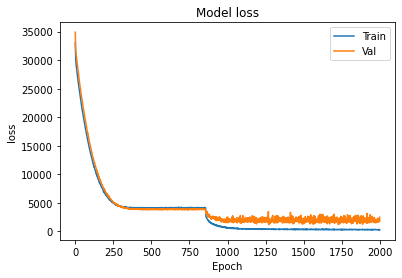

In [140]:
loss_plot(history)

In [141]:
#Test prediction
#use github as example
#read about hyperparameters and explore diff ones
#how will 2 be compared since there's no accuracy

In [142]:
y_test=np.array(y_test)


In [143]:
y_pred = model.predict(X_test)


In [144]:
y_pred

array([[132.41267 ],
       [148.80664 ],
       [116.39428 ],
       [185.49103 ],
       [113.128   ],
       [115.29368 ],
       [117.82064 ],
       [152.72568 ],
       [117.99998 ],
       [157.95573 ],
       [170.29047 ],
       [238.68367 ],
       [174.091   ],
       [155.51625 ],
       [187.4653  ],
       [283.2956  ],
       [222.58105 ],
       [315.67157 ],
       [122.22387 ],
       [192.25333 ],
       [182.04596 ],
       [101.8528  ],
       [202.90822 ],
       [148.7901  ],
       [315.66913 ],
       [ 97.37403 ],
       [204.2661  ],
       [157.3884  ],
       [146.68019 ],
       [155.0924  ],
       [ 99.524376],
       [218.35013 ],
       [259.1616  ],
       [116.17658 ],
       [315.67938 ],
       [160.01202 ],
       [173.49747 ],
       [247.80109 ],
       [156.31885 ],
       [115.931076],
       [108.59896 ],
       [192.63715 ],
       [203.5604  ],
       [245.70175 ],
       [160.16983 ],
       [127.422066],
       [218.86496 ],
       [250.4

In [151]:
#calculate test loss/mse

mean_squared_error(y_pred, y_test)

2704860.6249021376

In [153]:
from sklearn.metrics import mean_squared_error

In [155]:
mean_squared_error(y_pred, y_test)

40.82692377367922

In [137]:
#test_date = pd.DataFrame([X_test_date]).T
#type(test_date)

In [70]:
#test_date

In [71]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [72]:
#result_array = result_array.sort_values(by=['Date'])
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,132.85,127.797020,2015-07-21
1,144.49,146.539780,2017-06-28
2,116.44,112.414131,2015-09-25
3,191.81,185.287582,2019-06-10
4,108.91,108.700676,2016-04-08
...,...,...,...
372,112.02,111.164406,2015-12-17
373,205.53,207.896683,2019-08-02
374,148.82,147.237610,2017-07-17
375,273.61,286.779663,2020-04-22


In [73]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [74]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
45,125.72,121.274506,2015-07-15
357,127.74,123.765808,2015-07-16
0,132.85,127.797020,2015-07-21
128,125.32,123.379265,2015-07-24
241,123.38,121.061455,2015-07-28
...,...,...,...
49,319.25,315.110046,2020-05-29
34,344.72,315.114258,2020-06-12
76,351.46,315.090942,2020-06-16
236,365.00,315.011963,2020-06-24


In [75]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Actual vs Predicted')

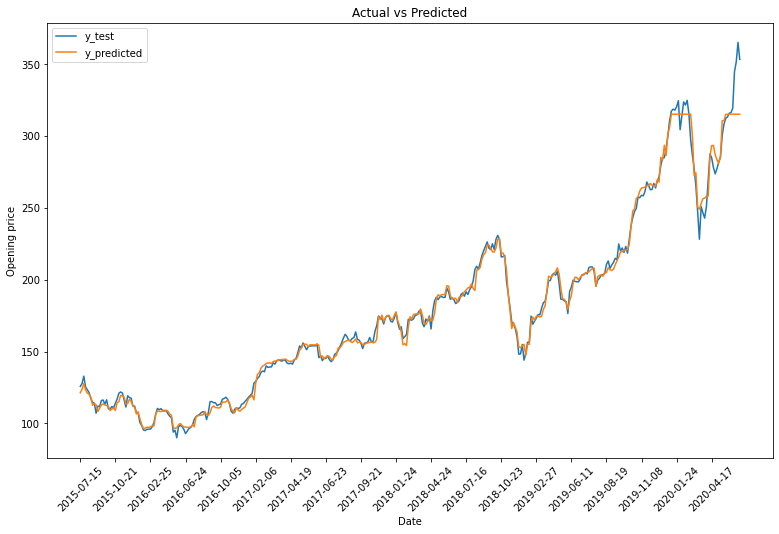

In [76]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Actual vs Predicted')

In [ ]:
X_test

Explanation of how you created your dataset.
• Any preprocessing steps you followed
• All design steps you went through in finding the best network in your report and how you chose your
final design.
• Architecture of your final network, number of epochs, batch size (if needed), loss function, training
algorithm, etc.
• Output of the training loop with comments on your output
• Output from testing, including the final plot and your comment on it
• What would happen if you used more days for features (feel free to actually try it – but do not
upload the datasets).